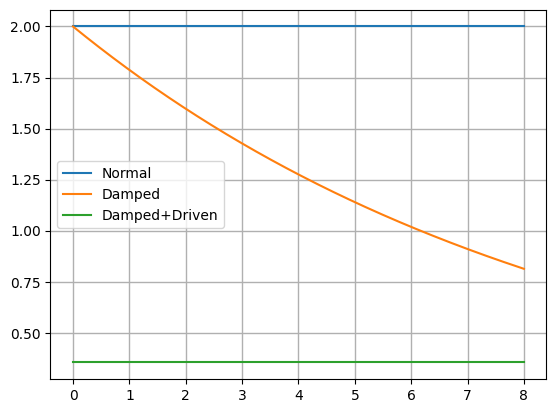

"plt.plot(xaxis,yaxis_mechanical)\nplt.plot(xaxis,yaxis_damped_mechanical)\nplt.legend(['Normal','Damped'])\nplt.grid(True, linewidth=1)\nplt.show()"

In [ ]:
import math
import matplotlib.pyplot as plt
frames = 60
pi = math.pi
e = math.e

def displacement(A,w,t,phaseconstant = 0):
    return A*math.cos(w*t + phaseconstant)

def velocity(A,w,t,phaseconstant = 0):
    return -A*w*math.sin(w*t + phaseconstant)

def acceleration(A,w,t,phaseconstant = 0):
    return -A*(w**(2))*math.cos(w*t + phaseconstant)

def kinetic_energy(m,v):
    return 0.5*m*(v**2)

def potential_energy(k,x):
    return 0.5*k*(x**2)

def mechanical_energy(k,A):
    return 0.5*k*(A**2)

def underdamping_displacement(A0,b,m,t,w,phaseconstant = 0):
    return A0*e**(-t*b/(2*m))*math.cos(w*t + phaseconstant)

def damping(b,m,w0):
    return (b/(2*m*w0))**2

def damped_angular_frequency(w0,b,m):
    return w0*(math.sqrt(1-damping(b,m,w0)))

def damped_energy(time,time_constant,E0):
    return E0*e**(-time/time_constant)

def time_constant_calculation(m,b):
    return m/b

def damped_amplitude(A0,time,time_constant):
    return math.sqrt((A0**2)*e**(-time/time_constant))

def driven_amplitude(F0,m,w0,w,b):
    return F0/(math.sqrt((m**2)*((w0**2-w**2)**2) + (b**2)*(w**2)))

'''def quality_factor(w0,r):
    return w0*r

def q_damped_angular_frequency(w0,r):
    return w0*(math.sqrt(1-1/((4*quality_factor(w0,r))**2)))'''



xaxis = []
yaxis_amplitude = []
yaxis_displacement = []
yaxis_velocity = []
yaxis_acceleration = []
yaxis_kinetic = []
yaxis_potential = []
yaxis_mechanical = []

yaxis_damped_amplitude = []
yaxis_damped_velocity = []
yaxis_damped_mechanical = []
yaxis_damped_kinetic = []
yaxis_damped_displacement = []
yaxis_damped_displacement_q = []

yaxis_driven_amplitude = []


spring_constant = pi**2
mass = 4
amplitude = 2
damping_constant = 0.9
driven_force = 0.5


natural_frequency = (spring_constant/mass)**0.5
damped_frequency = damped_angular_frequency(natural_frequency,damping_constant,mass)
time_constant = time_constant_calculation(mass,damping_constant)
initial_total_energy = mechanical_energy(spring_constant,amplitude)

for i in range(480+1):
    time = i/frames

    xaxis.append(time)

    #displacement_at_time = displacement(amplitude,natural_frequency,time)

    yaxis_amplitude.append(amplitude)
    amplitude_damped = damped_amplitude(amplitude,time,time_constant)
    yaxis_damped_amplitude.append(amplitude_damped)

    velocity_at_time = velocity(amplitude,natural_frequency,time)
    #yaxis_velocity.append(velocity_at_time)
    #damped_velocity_at_time = velocity(amplitude_damped,damped_frequency,time)
    #yaxis_damped_velocity.append(damped_velocity_at_time)

    #yaxis_acceleration.append(acceleration(amplitude,natural_frequency,time))

    yaxis_kinetic.append(kinetic_energy(mass,velocity_at_time))
    #yaxis_damped_kinetic.append(kinetic_energy(mass,damped_velocity_at_time))

    #yaxis_potential.append(potential_energy(spring_constant,displacement_at_time))

    #yaxis_mechanical.append(initial_total_energy)
    #yaxis_damped_mechanical.append(damped_energy(time,time_constant,initial_total_energy))

    #yaxis_displacement.append(displacement_at_time)
    #yaxis_damped_displacement.append(underdamping_displacement(amplitude,damping_constant,mass,time,damped_frequency))
    
    yaxis_driven_amplitude.append(driven_amplitude(driven_force,mass,natural_frequency,damped_frequency,damping_constant))


plt.plot(xaxis,yaxis_amplitude)
plt.plot(xaxis,yaxis_damped_amplitude)
plt.plot(xaxis,yaxis_driven_amplitude)
plt.legend(['Normal','Damped','Damped+Driven'])
plt.grid(True, linewidth=1)
plt.show()


#print(yaxis_velocity[-121],yaxis_damped_velocity[-121])


'''plt.plot(xaxis,yaxis_displacement)
plt.plot(xaxis,yaxis_velocity)
plt.plot(xaxis,yaxis_acceleration)
plt.legend(['displacement','velocity','acceleration'])
plt.show()

plt.plot(xaxis,yaxis_kinetic)
plt.plot(xaxis,yaxis_potential)
plt.plot(xaxis,yaxis_mechanical)
plt.legend(['Kinetic','Potential','Mechanical'])
plt.show()'''

'''plt.plot(xaxis,yaxis_mechanical)
plt.plot(xaxis,yaxis_damped_mechanical)
plt.legend(['Normal','Damped'])
plt.grid(True, linewidth=1)
plt.show()'''

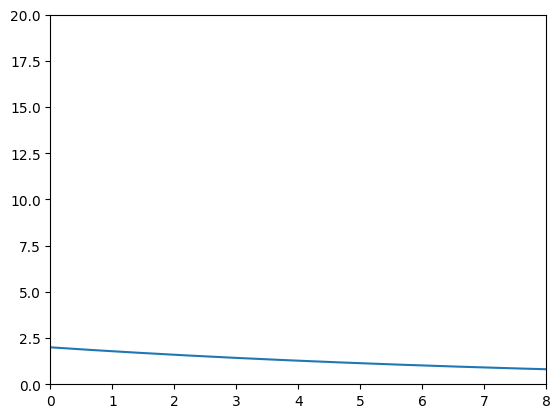

In [16]:
from matplotlib.animation import FuncAnimation

fig, axis = plt.subplots()
# animated_plot, = axis.plot([], [], 'o', markersize = 5, color = 'blue')
axis.plot(xaxis, yaxis_damped_amplitude)
axis.set_xlim([0, 8])
axis.set_ylim([0, 20])
# axis.set_title()

# def update(frame):
#     animated_plot.set_data([xaxis[frame]], [10])
#     return

# animation = FuncAnimation(
#     fig = fig,
#     func = update(frames),
#     frames = frames,
#     interval = 30
# )

plt.show()